# Practica 4: Regresión Parte 2
**Elaborado por: Luis Fernando Becerra,  BEDA Aprendizaje de Máquinas 2024-1S **

Vamos a probar dos modelos avanzados de regresion: Redes Neuronales y Bosques Aleatorios. Para esto usaremos los datos housing. Estos datos incluyen información sobre precio de la vivienda un determinado distrito de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Hay que tener en cuenta que los datos no están depurados, por lo que se requieren algunos pasos de preprocesamiento. Las caracteristicas incluidas son:

* longitude
* latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value
* ocean_proximity

## Lectura de datos y pre-procesamiento



In [ ]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Leer archivo housing.csv
df = pd.read_csv('housing.csv')

In [ ]:
#Revisión de los datos
#Cabecera
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#Información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Eliminar muestras con valores perdidos
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#Conversión de variables categoricas
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


##  División de los datos para entrenamiento

Nuestra variable objetivo es el valor de la vivienda ('median_house_value').

In [ ]:
#Separamos entradas (X) y salidas (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
# Dividimos los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Normalizando los datos
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14303, 13) (6130, 13) (14303,) (6130,)


Vamos a normalizar los datos. Para ello utilizaremos el metodo min_max_scaler

##Perceptron Multicapa usando Keras

Keras es un API de alto nivel para Deep Learning (DL). Permite construir, entrenar, evaluar y ejecutar varias clases de redes neuronales.

Se recomienda consultar las especificaciones técnicas de la librería en el siguiente link.

Existen otros APIs para la implementación de técnicas de DL. Sin embargo, Keras ha ganado popularidad por su facilidad de uso, flexibilidad, y portabilidad.

TensorFlow incluye la librería Keras, facilitando la lectura y preprocesamiento de datos. En esta práctica usaremos esta librería tk.keras, aunque no usaremos características específicas de TensorFlow. Esta librería se encuentra preinstalada en colab.

Otra librería popular es PyTorch. Las versiones recientes de PyTorch y Keras son similares, en parte inspiradas por la facilidad de uso de Scikit-Learn. Por lo anterior, una vez se conoce Keras no debe ser difícil cambiar a PyTorch.

Paso 1
Vamos a construir una red neuronal multicapa

In [ ]:
# Importacion de librerias
from keras.models import Sequential
from keras.layers import Dense

Ahora, vamos a construir la red neuronal multicapa (MLP) empleando el modelo Sequential API de Keras. Este modelo permite crear una pila de capas simples.

Entre los tipos de capas que podemos crear se encuentra:


1.   Flatten: permite pasar datos matriciales a 1 dimensión. En este proceso se agrega una dimensión a cada muestra con un valor de 1s (para incluir el bias como un peso en el entrenamiento)
2.   Dense: capas de neuronas completamente conectada. Entre los parámetros se incluyen el número de neuronas y la función de activación. Los pesos se inicializan de forma aleatoria y el bias se inicializa en 0s. Las funciones de activacion soportadas las puede consultar en este [link](https://keras.io/api/layers/activations/).


In [ ]:
#Construccion del MLP
model = Sequential() #Instancia del modelo
model.add(Dense(200, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary() #Resume arquitectura de nuestra red

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 200)            │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,001 (89.85 KB)

 Trainable params: 23,001 (89.85 KB)

 Non-trainable params: 0 (0.00 B)

Nota: cada capa incluye un gran número de parámetros. Por ejemplo, la primera capa oculta tiene 13x1000 pesos que estimar, más 1000 pesos relacionados con el bias. Esto implica que en total debemos entrenar para esta capa 14,000 parámetros. Esto permite una alta flexibilidad para ajustarse a los datos de entrenamiento, pero debido al tamaño del modelo puede tener un sobreajuste.

Exploremos un poco las capas del modelo:

In [ ]:
#Podemos acceder a la lista de capas:
model.layers

[<Dense name=dense_18, built=True>,
 <Dense name=dense_19, built=True>,
 <Dense name=dense_20, built=True>]

In [ ]:
#Revisar los pesos y bias de cada capa
hidden1 = model.layers[1]
print(hidden1.name)
#Mostrar los pesos
weights, biases = hidden1.get_weights()
print(weights)


dense_19
[[ 0.01093991  0.01240419  0.12252368 ... -0.01259062  0.12777607
  -0.0619057 ]
 [-0.00241964 -0.11694594  0.13008954 ... -0.06893869 -0.05096667
   0.01170364]
 [-0.06066789  0.09241395 -0.08138829 ...  0.12932818 -0.0489881
  -0.13076769]
 ...
 [ 0.02653468  0.11419649 -0.0865438  ... -0.0084552   0.02032976
   0.12004681]
 [-0.06074916 -0.13807453 -0.00315647 ...  0.10260341 -0.1052043
  -0.12107994]
 [ 0.11729135 -0.08856007  0.05550919 ...  0.13160391 -0.12651692
  -0.07676189]]


In [ ]:
#Mostrar biases
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Note que la capa se inicializa con pesos aleatorios y bias en 0s. Keras incluye otros métodos de inicialización de
los pesos. El tamaño de la primera capa oculta depende del número de entradas, por eso se recomienda incluir este número en la capa inicial.

Una vez creado el modelo, se invoca el método compile() que permite especificar:

*   La función de perdida: Keras incluye una gran variedad de funciones de perdida. Por ejemplo, diferentes tipos de entropía cruzada para clasificación, tipos de error como MSE y MAE para regresión, entre otros. Consulte las posibles funciones de perdida en este [link](https://keras.io/api/losses/).
*   El método de optimización: los optimizadores disponibles se pueden consultar en este [link](https://keras.io/api/optimizers/). El optimizar es el método empleado durante el algoritmo de backpropagation. En esta práctica usaremos SGD (Gradiente Estocástico Descendiente), inicialmente con sus parámetros por defecto (paso de aprendizaje = 0.01).
*   La métrica de evaluación: en este caso usaremos  el MSE. Otras métricas disponibles pueden consultarse en el siguiente [link](https://keras.io/api/metrics/).


In [ ]:
#Vamos a compilar el modelo
model.compile(optimizer='SGD',loss='mse',metrics=['mae'])

In [ ]:
#Una vez compilado, esta listo para ser entrenado
#a traves del metodo fit
#Le enviamos los datos de entrenamiento, el numero
#de epocas, y el set de validacion (opcional)
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=30,
                    batch_size=50,
                    verbose=1)

Epoch 1/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2786762597582228789657600.0000 - mae: 34833502208.0000 - val_loss: 110556426748821504.0000 - val_mae: 332500256.0000
Epoch 2/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29207648071057408.0000 - mae: 134521888.0000 - val_loss: 1026170093568.0000 - val_mae: 1006435.7500
Epoch 3/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 282481917952.0000 - mae: 419739.0312 - val_loss: 13259522048.0000 - val_mae: 90479.1797
Epoch 4/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13198971904.0000 - mae: 90562.9141 - val_loss: 13259776000.0000 - val_mae: 90968.5312
Epoch 5/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13051210752.0000 - mae: 90165.1797 - val_loss: 13258278912.0000 - val_mae: 90805.4219
Epoch 6/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13334208512.0000 - mae: 90986.0781 - val_loss: 13258921984.0000 - val_mae: 90893.6562
Epoch 7/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13351793664.0000 

Notas:

*   En vez de enviar los datos de validación, también puede especificar el porcentaje de datos a usar de validación. Por ejemplo, validation_split=0.1 indicara a Keras que use el 10% de los datos antes de aleatorizarlos para validación
*   El método fit() retorna un objeto con la historia del entrenamiento, incluyendo los parámetros entrenados, la lista de épocas con las métricas de desempeño seleccionada. Podemos usar estos datos para graficar la curva de aprendizaje del proceso.

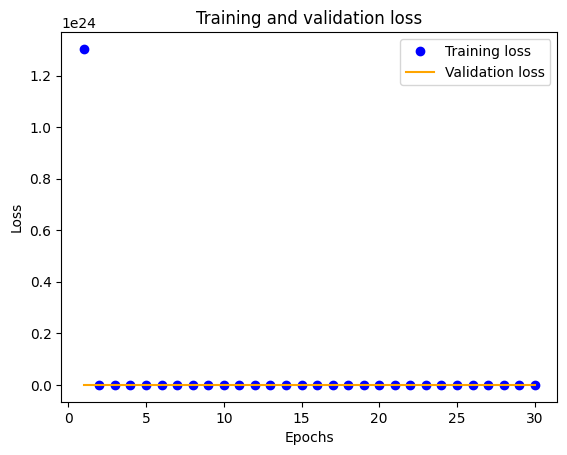

In [ ]:
#Curva de aprendizaje
history_dict = history.history
loss_values = history_dict['loss'] # puedes modificar esto
val_loss_values = history_dict['val_loss'] # puedes modificar esto
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Vamos a incluir EarlyStopping para evitar el sobreajuste y además a aumentar el número de epocas: permite detener el proceso cuando la función de perdida ya no esta decreciendo. El parametro patience indica el número de epocas a considerar cuando ya no hay una mejora del entrenamiento

In [ ]:
#Configurar EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)

NameError: name 'EarlyStopping' is not defined

In [ ]:
#Entrenamos el modelo
#Tomara unos minutos
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)

In [ ]:
# specificar las dimensiones
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# resultados de entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")

x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# resultados de validación
axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")

x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


fig.tight_layout()
plt.show()

** Realiza las Métricas de error de regresión. **

In [ ]:
#Metricas de desempeño
from sklearn import metrics

pred = model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2_score:', metrics.r2_score(y_test, pred))


# ¡Gran trabajo!